# Demo Visualization for reading level of Shrek characters

### Shane Caldwell

In [19]:
# Relevant Imports
from textstat.textstat import textstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

Goal here is to get the reading level of major characters. I will be plotting the The The Flesch-Kincaid Grade Level
of the character (found with flesch_kincaid_grade(dialogue)) by number of lines they have. 

Create one for each movie. See how it changes over time if it does. In d3 you should be able to select a film and have everything move in an attractive way organically, without harsh reloads. 

In [20]:
df = pd.read_csv("../data/shrek_dialog_w_timestamps.csv", index_col="Unnamed: 0")


In [21]:
shrek_lines = df[df.name=='SHREK']
shrek_speech = ""
for index, row in shrek_lines.iterrows():
    shrek_speech += row['dialog'] + " "
print(textstat.flesch_kincaid_grade(shrek_speech))

fiona_lines = df[df.name=='FIONA']
fiona_speech = ""
for index, row in fiona_lines.iterrows():
    fiona_speech += row['dialog'] + " "
print(textstat.flesch_kincaid_grade(fiona_speech))

donkey_lines = (df[df.name=='DONKEY']).fillna(value="")
donkey_speech = ""
for index, row in donkey_lines.iterrows():
    donkey_speech += row['dialog'] + " "
print(textstat.flesch_kincaid_grade(donkey_speech))

puss_lines = (df[df.name=='PUSS']).fillna(value= "")
puss_speech = ""
for index, row in puss_lines.iterrows():
    puss_speech += row['dialog'] + " "
print(textstat.flesch_kincaid_grade(puss_speech))

charming_lines = df[df.name=='PRINCE CHARMING']
charming_lines = charming_lines.fillna(value = "")
charming_speech = ""
for index, row in charming_lines.iterrows():
    charming_speech += row['dialog'] + " "
print(textstat.flesch_kincaid_grade(charming_speech))

1.6
1.4
2.7
2.6
2.6


So let's write a function to get us those scores for every single character 


In [22]:
def reading_score_for_character(df, character_name):
    char_lines = df[df.name==character_name].fillna(value = "")
    char_speech = ""
    for index, row in char_lines.iterrows():
        char_speech += row['dialog'] + " "
    return textstat.flesch_kincaid_grade(char_speech)

In [45]:
#grab all character names
names = df.name.unique()

reading_level = [["name","reading_level"]]

#append the score
for name in names:
    score = reading_score_for_character(df, name)
    reading_level.append([name, score])

headers = reading_level.pop(0)

#create reading level here
read_df = pd.DataFrame(reading_level, columns=headers)

read_df.sort_values(by = "reading_level", ascending=False)
lines = df.groupby('name').count().max(1).sort_values(ascending=False)

#hacky mess, but it'll work
line_amounts = [["name", "num_lines"]]
for i, v in lines.items():
    line_amounts.append([i, v])
    
headers = line_amounts.pop(0)
lines_df = pd.DataFrame(line_amounts, columns=headers)

reading_level_df = pd.merge(read_df, lines_df, on='name')


If a character has less than 20 lines, they may not be important to the plot. We will remove them because it crowds the graph and skews the reading level test results.

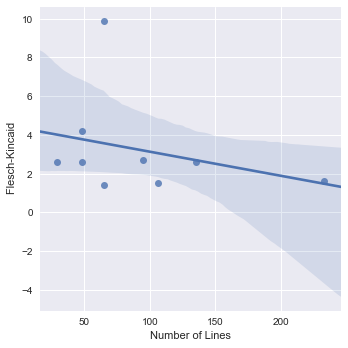

In [54]:
sns.set(style="darkgrid")

reading_level_df = reading_level_df[~(reading_level_df['num_lines'] <= 20)]
g = sns.lmplot('num_lines', 'reading_level', data=reading_level_df, fit_reg=True)
g.set_axis_labels('Number of Lines', ' Flesch-Kincaid')

Awesome! It seems there's a general downard trends - the more lines, the more a speaker tends to go down on the test, with a couple of outliers.

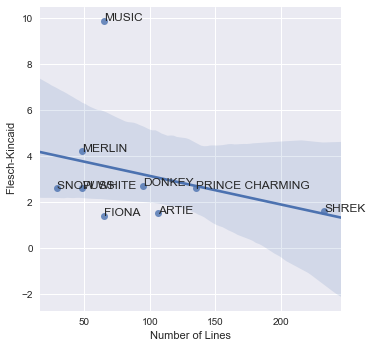

In [55]:
sns.set(style="darkgrid")

reading_level_df = reading_level_df[~(reading_level_df['num_lines'] <= 20)]
g = sns.lmplot('num_lines', 'reading_level', data=reading_level_df, fit_reg=True)
g.set_axis_labels('Number of Lines', ' Flesch-Kincaid')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(reading_level_df.num_lines, reading_level_df.reading_level, reading_level_df.name, plt.gca())  


Ah, looks like the music is skewing our data a bit! Let's fix that.



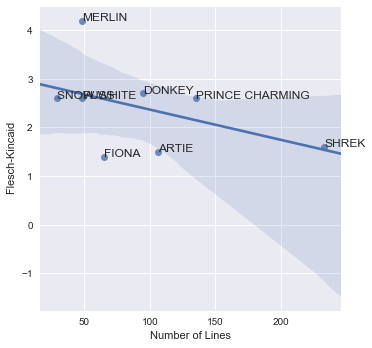

In [57]:
sns.set(style="darkgrid")

reading_level_df = reading_level_df[~(reading_level_df['name'].str.contains('MUSIC'))]
g = sns.lmplot('num_lines', 'reading_level', data=reading_level_df, fit_reg=True)
g.set_axis_labels('Number of Lines', ' Flesch-Kincaid')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(reading_level_df.num_lines, reading_level_df.reading_level, reading_level_df.name, plt.gca())  

